In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping, Callback

In [4]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 208s 1us/step


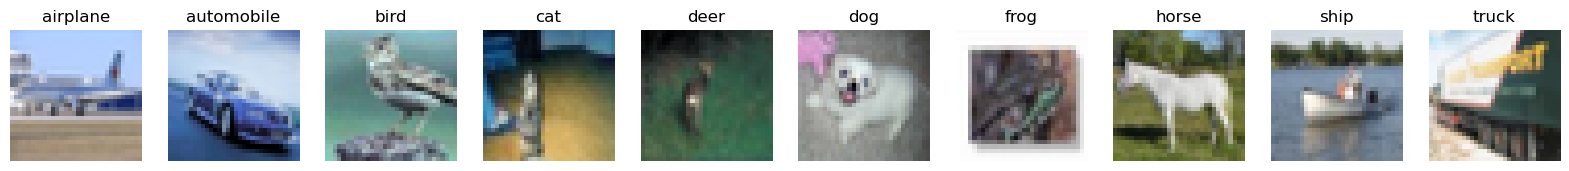

In [5]:
# Display a random image from each class
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
fig, ax = plt.subplots(1, len(class_names), figsize=(20, 20))
for i in range(len(class_names)):
    class_indices = np.where(y_train == i)[0]
    random_index = random.choice(class_indices)
    ax[i].imshow(x_train[random_index])
    ax[i].axis('off')
    ax[i].set_title(class_names[i])
plt.show()

In [6]:
# Preprocess the data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [7]:
# Custom callback to stop training when accuracy is above 95%
class CustomCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs['val_accuracy'] > 0.95:
            print(f'\nReached 95% validation accuracy. Stopping training.')
            self.model.stop_training = True

In [8]:
# Build the model
model = Sequential()
    # CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# FLATTERN => DENSE => RELU => DROPOUT
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# a softmax classifier
model.add(Dense(10))
model.add(Activation('softmax'))



In [9]:
# Find the best epoch using early stopping and custom callback
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
cc = CustomCallback()
history = model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=50, batch_size=64, validation_split=0.2, callbacks=[es, cc])

Epoch 1/50
625/625 [==============================] - 82s 128ms/step - loss: 1.5838 - accuracy: 0.4232 - val_loss: 1.2163 - val_accuracy: 0.5649
Epoch 2/50
625/625 [==============================] - 77s 123ms/step - loss: 1.1694 - accuracy: 0.5840 - val_loss: 1.0009 - val_accuracy: 0.6487
Epoch 3/50
625/625 [==============================] - 79s 127ms/step - loss: 1.0043 - accuracy: 0.6485 - val_loss: 0.8732 - val_accuracy: 0.6959
Epoch 4/50
625/625 [==============================] - 86s 137ms/step - loss: 0.8974 - accuracy: 0.6841 - val_loss: 0.8184 - val_accuracy: 0.7225
Epoch 5/50
625/625 [==============================] - 84s 134ms/step - loss: 0.8247 - accuracy: 0.7111 - val_loss: 0.7320 - val_accuracy: 0.7468
Epoch 6/50
625/625 [==============================] - 78s 124ms/step - loss: 0.7676 - accuracy: 0.7286 - val_loss: 0.7098 - val_accuracy: 0.7495
Epoch 7/50
625/625 [==============================] - 77s 124ms/step - loss: 0.7190 - accuracy: 0.7468 - val_loss: 0.7063 - val_ac

In [10]:
# Test the accuracy of the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.2f}')

313/313 [==============================] - 6s 18ms/step - loss: 0.6588 - accuracy: 0.7743
Test accuracy: 0.77
